### Overfitting and Underfitting

Chollet "Deep Learnng with Python", Chapter 4 on Overfitting

See

https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/4.4-overfitting-and-underfitting.ipynb

Runs correctly under TF 1.15, checked 1/15/2021

When running this on Google Colab,  using a GPU and a high memory runtime configuration,  1/17/2023

In [1]:
import tensorflow as tf

In [2]:
# this cell is for tensorflow 2.0 and higher
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# this cell is for tensorflow 2.0 and higher
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
# Check to see how much memory we have available
# Disk
# 26.3 / 225.8 GB

# Disk
# 26.3 / 225.8 GB

In [5]:
import psutil

psutil.virtual_memory().total  # total physical memory in Bytes

54754058240

Check to see what GPU we have

In [6]:
!nvidia-smi

Fri Feb 16 00:02:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              38W / 300W |    308MiB / 16384MiB |      2%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Using the IMDB data set again as an example

In [7]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 [==============================] - 1s 0us/step


The original model for this data set

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [9]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [10]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 79ms/step - loss: 0.4924 - acc: 0.8113 - val_loss: 0.3731 - val_acc: 0.8752
Epoch 2/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2973 - acc: 0.8976 - val_loss: 0.2972 - val_acc: 0.8892
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2303 - acc: 0.9174 - val_loss: 0.2797 - val_acc: 0.8891
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1927 - acc: 0.9311 - val_loss: 0.2836 - val_acc: 0.8869
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1709 - acc: 0.9392 - val_loss: 0.2886 - val_acc: 0.8852
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1514 - acc: 0.9472 - val_loss: 0.3194 - val_acc: 0.8774
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1371 - acc: 0.9522 - val_loss: 0.3156 - val_acc: 0.8792
Epoch 8/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1242 - a

In [11]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 76ms/step - loss: 0.6277 - acc: 0.6549 - val_loss: 0.5829 - val_acc: 0.7486
Epoch 2/20
49/49 [==============================] - 1s 18ms/step - loss: 0.5400 - acc: 0.7968 - val_loss: 0.5253 - val_acc: 0.8024
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.4840 - acc: 0.8521 - val_loss: 0.4848 - val_acc: 0.8527
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.4415 - acc: 0.8828 - val_loss: 0.4548 - val_acc: 0.8686
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.4062 - acc: 0.9012 - val_loss: 0.4312 - val_acc: 0.8804
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3756 - acc: 0.9150 - val_loss: 0.4129 - val_acc: 0.8788
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3473 - acc: 0.9267 - val_loss: 0.3986 - val_acc: 0.8800
Epoch 8/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3214 - a

In [12]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
original_loss=original_hist.history['loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']
smaller_model_loss = smaller_model_hist.history['loss']

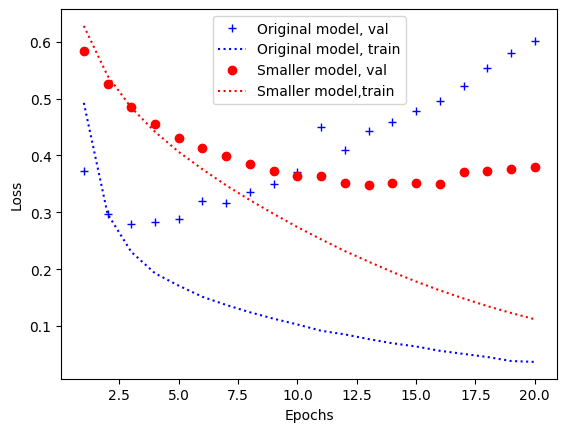

In [13]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model, val')
plt.plot(epochs, original_loss, 'b:', label='Original model, train')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'ro', label='Smaller model, val')
plt.plot(epochs, smaller_model_loss, 'r:', label='Smaller model,train')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Question/Action

What does the divergence of the Losses for training and validation data mean?

- Both show signs of overfitting because both show an increase in valdation data and it reachs the max epochs

Which model suffers more from this effect?

- The orginal model suffers more

Which model seems to achieve the highest validation performance and at how many epochs?

- Smaller model has the best validation preformance at around 12.5 to 15 epochs

In [14]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [15]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 76ms/step - loss: 0.4945 - acc: 0.7656 - val_loss: 0.3695 - val_acc: 0.8411
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2683 - acc: 0.8900 - val_loss: 0.3424 - val_acc: 0.8511
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2118 - acc: 0.9149 - val_loss: 0.2739 - val_acc: 0.8896
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1639 - acc: 0.9360 - val_loss: 0.2924 - val_acc: 0.8832
Epoch 5/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1241 - acc: 0.9530 - val_loss: 0.3571 - val_acc: 0.8715
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.0849 - acc: 0.9694 - val_loss: 0.3573 - val_acc: 0.8824
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.0651 - acc: 0.9776 - val_loss: 0.3597 - val_acc: 0.8808
Epoch 8/20
49/49 [==============================] - 1s 19ms/step - loss: 0.0485 - a

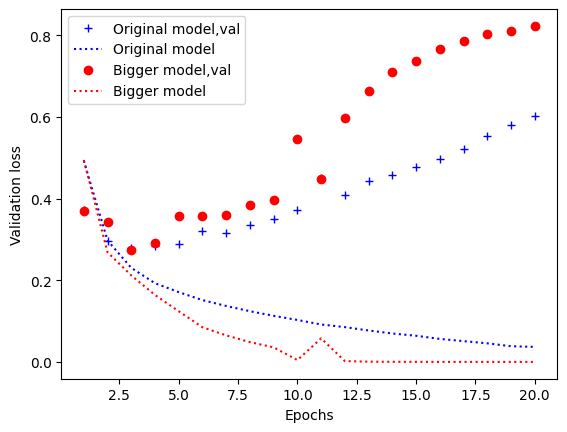

In [16]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']
bigger_model_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model,val')
plt.plot(epochs, original_loss, 'b:', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'ro', label='Bigger model,val')
plt.plot(epochs, bigger_model_loss, 'r:', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

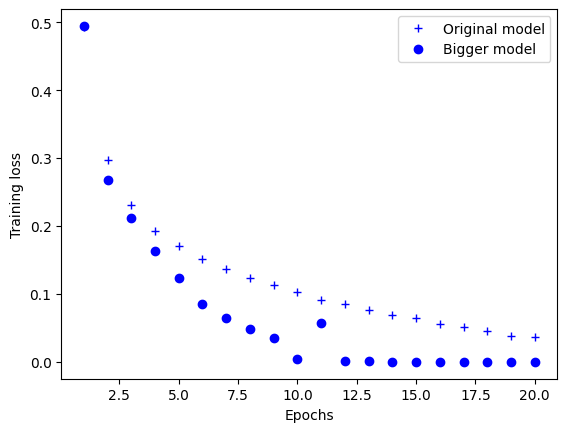

In [17]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [18]:
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

# Question

What is L2 regularization?

- L2 regularization, known as weight decay in the context of neural networks, is commonly applied to the weights of the neural network layers. It helps prevent overfitting by shrinking the weights, making the network less sensitive to small changes in input data

In [20]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 77ms/step - loss: 0.5233 - acc: 0.8116 - val_loss: 0.4009 - val_acc: 0.8778
Epoch 2/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3396 - acc: 0.8968 - val_loss: 0.3428 - val_acc: 0.8867
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2880 - acc: 0.9154 - val_loss: 0.3390 - val_acc: 0.8862
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2611 - acc: 0.9240 - val_loss: 0.3356 - val_acc: 0.8846
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2485 - acc: 0.9307 - val_loss: 0.3596 - val_acc: 0.8786
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2359 - acc: 0.9358 - val_loss: 0.3654 - val_acc: 0.8766
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2289 - acc: 0.9386 - val_loss: 0.3676 - val_acc: 0.8762
Epoch 8/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2245 - a

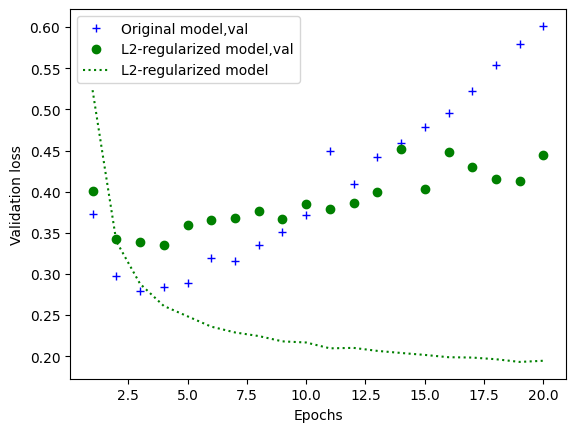

In [21]:
l2_model_val_loss = l2_model_hist.history['val_loss']
l2_model_loss = l2_model_hist.history['loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model,val')
plt.plot(epochs, l2_model_val_loss, 'go', label='L2-regularized model,val')
plt.plot(epochs, l2_model_loss, 'g:', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# Question/Action

What does this plot imply about the level of regularization?   How could you increase the regularization?  Can you get higher performance by doing this?

- The L2 regularization helps with overfitting. We could increase regularization by shrinking the weights, making the network less sensitive to small changes in input data.

What happens if you look at accuracy instead of loss?

- We can see that is not overfit because the validation boucing around the accuracy of the training data

Can you create a model using L1 regularization?

- Sure can look below

Just what are L1 and L2 regularization anyway?
- L1 Regularization, also called a lasso regression, adds the “absolute value of magnitude” of the coefficient as a penalty term to the loss function.
- L2 Regularization, also called a ridge regression, adds the “squared magnitude” of the coefficient as the penalty term to the loss function.

Epoch 1/20
49/49 [==============================] - 4s 75ms/step - loss: 2.2337 - acc: 0.7720 - val_loss: 1.7022 - val_acc: 0.8224
Epoch 2/20
49/49 [==============================] - 1s 18ms/step - loss: 1.5186 - acc: 0.8279 - val_loss: 1.3533 - val_acc: 0.8154
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 1.2141 - acc: 0.8254 - val_loss: 1.0858 - val_acc: 0.8370
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.9905 - acc: 0.8247 - val_loss: 0.8999 - val_acc: 0.8351
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.8342 - acc: 0.8277 - val_loss: 0.7760 - val_acc: 0.8339
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.7345 - acc: 0.8241 - val_loss: 0.6996 - val_acc: 0.8284
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.6752 - acc: 0.8293 - val_loss: 0.6736 - val_acc: 0.8042
Epoch 8/20
49/49 [==============================] - 1s 18ms/step - loss: 0.6450 - a

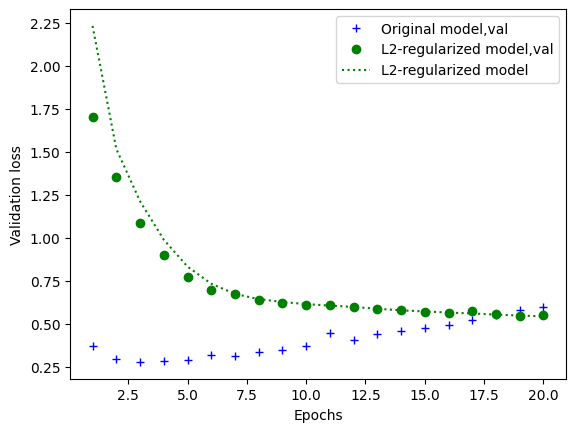

In [28]:
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.1),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.1),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

l2_model_val_loss = l2_model_hist.history['val_loss']
l2_model_loss = l2_model_hist.history['loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model,val')
plt.plot(epochs, l2_model_val_loss, 'go', label='L2-regularized model,val')
plt.plot(epochs, l2_model_loss, 'g:', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [30]:
for i in l2_model_hist.history:
  print(i)

loss
acc
val_loss
val_acc


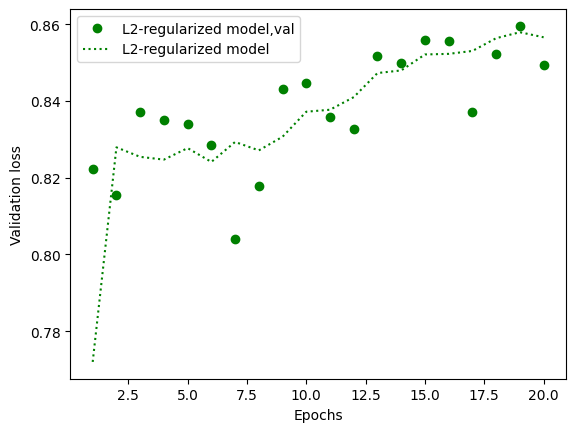

In [32]:

l2_model_val_loss = l2_model_hist.history['val_acc']
l2_model_loss = l2_model_hist.history['acc']

plt.plot(epochs, l2_model_val_loss, 'go', label='L2-regularized model,val')
plt.plot(epochs, l2_model_loss, 'g:', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Epoch 1/20
49/49 [==============================] - 4s 75ms/step - loss: 31.4631 - acc: 0.4834 - val_loss: 13.5289 - val_acc: 0.4862
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 12.7843 - acc: 0.4869 - val_loss: 12.0158 - val_acc: 0.4993
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 11.6763 - acc: 0.4914 - val_loss: 11.3775 - val_acc: 0.4959
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 10.7631 - acc: 0.4974 - val_loss: 10.1492 - val_acc: 0.5000
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 9.9751 - acc: 0.5002 - val_loss: 9.8237 - val_acc: 0.5000
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 9.3955 - acc: 0.4945 - val_loss: 8.9717 - val_acc: 0.5000
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 8.9694 - acc: 0.4921 - val_loss: 8.9958 - val_acc: 0.5000
Epoch 8/20
49/49 [==============================] - 1s 19ms/step - loss: 8.

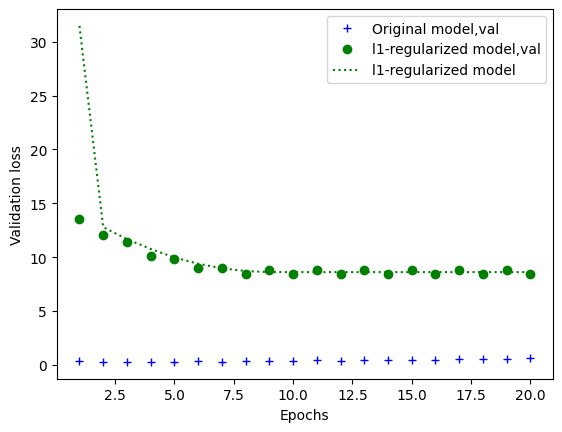

In [33]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.1),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.1),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

l1_model_val_loss = l1_model_hist.history['val_loss']
l1_model_loss = l1_model_hist.history['loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model,val')
plt.plot(epochs, l1_model_val_loss, 'go', label='l1-regularized model,val')
plt.plot(epochs, l1_model_loss, 'g:', label='l1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


## Adding Dropout

# At training time: we drop out 50% of the units in the output
layer_output *= np.randint(0, high=2, size=layer_output.shape)

# At test time:
layer_output *= 0.5

# At training time:
layer_output *= np.randint(0, high=2, size=layer_output.shape)
# Note that we are scaling *up* rather scaling *down* in this case
layer_output /= 0.5

In [22]:
drop_mag=0.5

dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(drop_mag))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(drop_mag))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [23]:

dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 76ms/step - loss: 0.6097 - acc: 0.6618 - val_loss: 0.4753 - val_acc: 0.8638
Epoch 2/20
49/49 [==============================] - 1s 18ms/step - loss: 0.4716 - acc: 0.7978 - val_loss: 0.3718 - val_acc: 0.8811
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3836 - acc: 0.8544 - val_loss: 0.3093 - val_acc: 0.8864
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3228 - acc: 0.8844 - val_loss: 0.2816 - val_acc: 0.8889
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2847 - acc: 0.9024 - val_loss: 0.2766 - val_acc: 0.8872
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2481 - acc: 0.9140 - val_loss: 0.2797 - val_acc: 0.8878
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2209 - acc: 0.9283 - val_loss: 0.2903 - val_acc: 0.8855
Epoch 8/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2015 - a

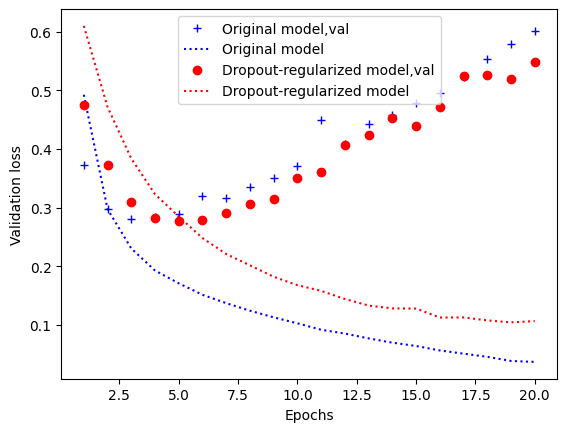

In [24]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']
dpt_model_loss = dpt_model_hist.history['loss']

plt.plot(epochs, original_val_loss, 'b+', label='Val Original model,val')
plt.plot(epochs, original_loss, 'b:', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'ro', label='Val Dropout-regularized model,val')
plt.plot(epochs, dpt_model_loss, 'r:', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

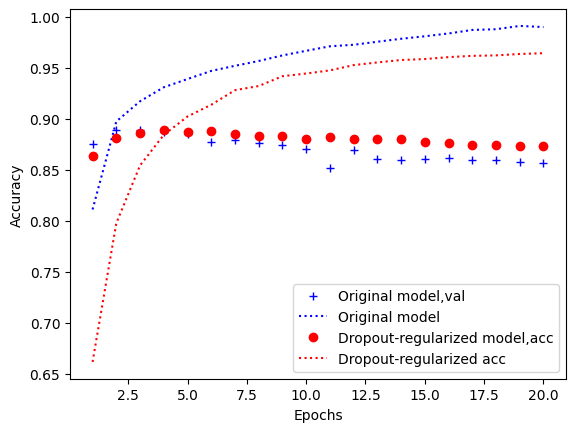

In [25]:
dpt_model_val_acc = dpt_model_hist.history['val_acc']
dpt_model_acc = dpt_model_hist.history['acc']

original_val_acc = original_hist.history['val_acc']
original_acc=original_hist.history['acc']

plt.plot(epochs, original_val_acc, 'b+', label='Val Original model,val')
plt.plot(epochs, original_acc, 'b:', label='Original model')
plt.plot(epochs, dpt_model_val_acc, 'ro', label='Val Dropout-regularized model,acc')
plt.plot(epochs, dpt_model_acc, 'r:', label='Dropout-regularized acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Question/Action

Can you improve the performance by altering the dropout?

- We saw the model was still overfit with a 50% dropout so we increased the number to 75% to decrease the rate at which the model was overfit

Can you create a plot that shows AUC instead of accuracy?


Epoch 1/20
49/49 [==============================] - 6s 81ms/step - loss: 0.6695 - acc: 0.5813 - auc: 0.6165 - val_loss: 0.6130 - val_acc: 0.8226 - val_auc: 0.8984
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.6080 - acc: 0.6694 - auc: 0.7315 - val_loss: 0.5312 - val_acc: 0.8604 - val_auc: 0.9312
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.5546 - acc: 0.7184 - auc: 0.7893 - val_loss: 0.4400 - val_acc: 0.8743 - val_auc: 0.9420
Epoch 4/20
49/49 [==============================] - 1s 20ms/step - loss: 0.5096 - acc: 0.7510 - auc: 0.8314 - val_loss: 0.3812 - val_acc: 0.8791 - val_auc: 0.9464
Epoch 5/20
49/49 [==============================] - 1s 21ms/step - loss: 0.4851 - acc: 0.7690 - auc: 0.8494 - val_loss: 0.3544 - val_acc: 0.8771 - val_auc: 0.9486
Epoch 6/20
49/49 [==============================] - 1s 20ms/step - loss: 0.4615 - acc: 0.7857 - auc: 0.8656 - val_loss: 0.3329 - val_acc: 0.8843 - val_auc: 0.9496
Epoch 7/20
49/49 [====

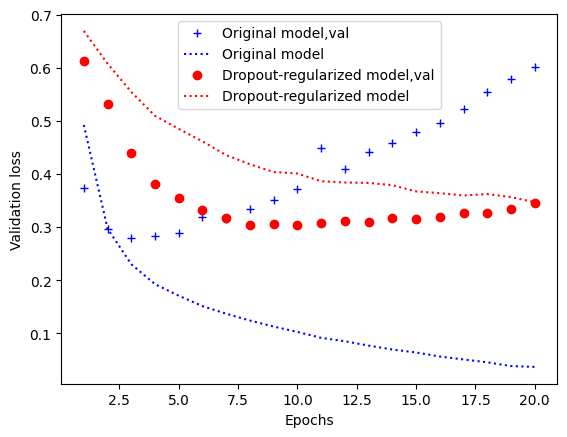

In [40]:
drop_mag=0.75

dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(drop_mag))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(drop_mag))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc', 'AUC'])

dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

dpt_model_val_loss = dpt_model_hist.history['val_loss']
dpt_model_loss = dpt_model_hist.history['loss']

plt.plot(epochs, original_val_loss, 'b+', label='Val Original model,val')
plt.plot(epochs, original_loss, 'b:', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'ro', label='Val Dropout-regularized model,val')
plt.plot(epochs, dpt_model_loss, 'r:', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

predictions = dpt_model.predict(x_test)


fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

782/782 [==============================] - 1s 2ms/step


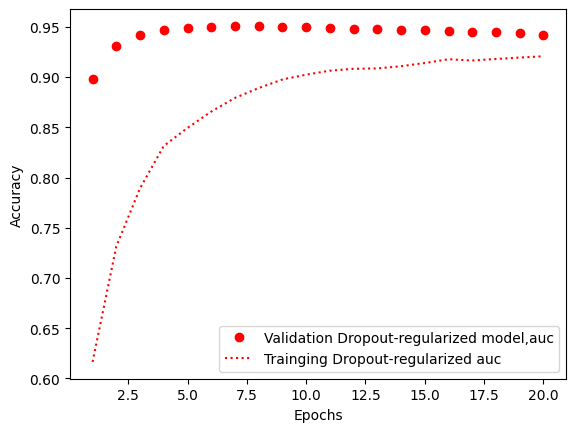

In [44]:
dpt_model_val_acc = dpt_model_hist.history['val_auc']
dpt_model_acc = dpt_model_hist.history['auc']

# original_val_acc = original_hist.history['val_auc']
# original_acc=original_hist.history['auc']

# plt.plot(epochs, original_val_acc, 'b+', label='Original model,val')
# plt.plot(epochs, original_acc, 'b:', label='Original model')
plt.plot(epochs, dpt_model_val_acc, 'ro', label='Validation Dropout-regularized model,auc')
plt.plot(epochs, dpt_model_acc, 'r:', label='Training Dropout-regularized auc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()